<a href="https://colab.research.google.com/github/jpmarques-13/PDI/blob/master/MACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importando bibliotecas utilizadas

In [0]:
import numpy as np
import cv2
from scipy.stats import mode , skew , kurtosis
from scipy.fftpack import fft
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl

Upando imagens

In [93]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving teste64.pgm to teste64 (1).pgm
Saving treino64.pgm to treino64 (2).pgm
User uploaded file "teste64.pgm" with length 4109 bytes
User uploaded file "treino64.pgm" with length 4109 bytes


Lendo imagens em forma de variaveis

In [0]:
treino = cv2.imread('treino64.pgm',0) 
teste = cv2.imread('teste64.pgm',0)



## Imagens utilizadas para treino e teste 

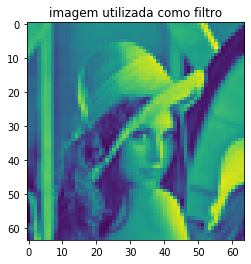

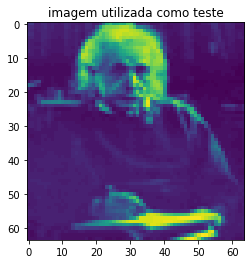

In [95]:
plt.figure()
plt.title('imagem utilizada como filtro')
plt.imshow(treino)

plt.figure()
plt.title('imagem utilizada como teste')
plt.imshow(teste)



In [0]:
def FiltroMACE(input):
  X = np.fft.fft2(input)                                                        #armazenando a fft da imagem
  X = np.fft.fftshift(X)
  X = X.reshape((X.shape[0]*X.shape[1], 1))                                     #posiciona valores em um array 1D
  D = np.diag(X.flatten())                                                      #calcula valor de D
  Di = np.linalg.inv(D)                                                         #inversa de D
  Xct = np.conj(np.transpose(X))                                                #conjulgado transposta de X
  H = np.matmul(Di,np.matmul(X,np.matmul(np.matmul(Xct,Di),X)))                 #calculando H
  return H.reshape((input.shape[0],input.shape[1]))

In [0]:
def MACE(input,H):
  R = np.fft.ifftshift(np.fft.ifft2(input*np.conj(H.reshape((treino.shape[0],treino.shape[1])))))
  return np.real(R)

obtendo resposta ao impulso do filtro MACE

In [0]:
H = FiltroMACE(treino)

Calculando a saida do filtro MACE para 2 imagens diferentes 

In [0]:
teste1 = MACE(treino,H)
teste2 = MACE(teste,H)

Ajustando parametros para o plot

In [0]:

x=np.arange(0,teste1.shape[0])
y=np.arange(0,teste1.shape[1])
z1=teste1
z2=teste2



## Filtro MACE (criado com apenas 1 imagem de treino) correlacionado com imagem pertencente a sua classe

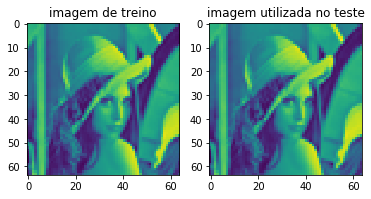

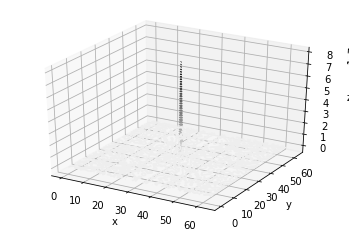

In [108]:
plt.figure()
plt.subplot(121)
plt.title('imagem de treino')
plt.imshow(treino)
plt.subplot(122)
plt.title('imagem utilizada no teste')
plt.imshow(treino)


fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(x,y,z1, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



## Filtro MACE (criado com apenas 1 imagem de treino) correlacionada com uma imagem nao pertencente a sua classe

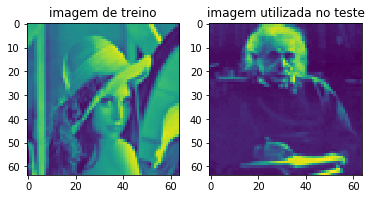

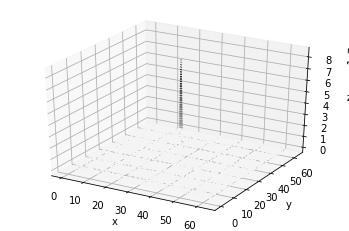

In [109]:
plt.figure()
plt.subplot(121)
plt.title('imagem de treino')
plt.imshow(treino)
plt.subplot(122)
plt.title('imagem utilizada no teste')
plt.imshow(teste)


fig = plt.figure()

ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(x,y,z2, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');